In [6]:
# Dependencies
# Python 2.X

# import the netCDF4 library for Python (doesn't support Python 3.X so far)
import netCDF4

# import numpy (for numerical calculation)
import numpy as np

# import matplotlib (for generating graphs)
from matplotlib import pyplot as plotter

# import os to get username from the system for this demo  
import os

## Find and open the netCDF file

In [7]:
# Open the file in the reading mode
user_name = os.environ['NAMESPACE']
file_directory = '/home/{}/data/vnir_tutorial.nc'.format(user_name)
file_handler   = netCDF4.Dataset(file_directory, "r")

# See the properties of the file
print file_handler

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: None given (supply with --trr ttl="Title")
    created_by: yanliu
    Conventions: CF-1.5
    Project: TERRAREF
    terraref_script: hyperspectral_workflow.sh
    terraref_hostname: cg-cmp12
    terraref_version: 4.6.2-beta03
    history: Wed Feb  8 05:56:59 2017: ncks --deflate 9 /home/jiarunm/compression/have_a_try.nc final.nc
Wed Feb  8 05:56:18 2017: ncks -O -d y,6.7,6.9 -d x,202.8,203.0 -d wavelength,0.4e-6,0.7e-6 /projects/arpae/terraref/sites/ua-mac/Level_1/hyperspectral/2016-09-30/2016-09-30__14-10-47-713/532ec234-3d73-4357-9043-627da6c34c34_.nc /home/jiarunm/compression/have_a_try.nc
Thu Jan 26 08:07:58 2017: ncap2 -A --hdr_pad=10000 -s @drc_spt="/gpfs/largeblockFS/projects/arpae/terraref/shared/extractors/extractors-hyperspectral/hyperspectral" -S /gpfs/largeblockFS/projects/arpae/terraref/shared/extractors/extractors-hyperspectral/hyperspectral/hyperspectral_calibration.nco /gpfs_

## Structure of a netCDF file

### Dimensions, Groups and Values 

- The output above is a little bit messy, lets look at the values that we are care about. In the Hyperspectral Workflow, some of the variables are saved directly to the file root, while others are in more structured groups. Most of the numerical variables have dimensions, which give them real-world meanings.

- netCDF4 Dimensions, Groups and Values are saved together in OrderDicts, which are a high-performance container implemented by the Python Standard Library. Users can use the similar methods and syntaxes to access the values (and value pairs), e.g., items(), keys(), values(), etc.

- Usually the keys are the name of dimensions, groups an values, and the values are the \<value objects>.


In [8]:
# Shows the dimensions in the Hyperspectral outputs

for name, value in file_handler.dimensions.items():
    print "{:10s} = {:<4d}".format(name, value.size)

wavelength = 469 
time       = 4621
y          = 203 
x          = 195 
wvl_clb    = 2201


In [7]:
# Shows the variables and their attributes in the Hyperspectral outputs ROOT LEVEL
# We here only print out the first five variables

for name, value in file_handler.variables.items()[:5]:
    print "variable name:", name # <-- Attribute Names
    
    for attributes in value.__dict__.keys():
        print " "*16 + "--> " + "{:15s}:{}".format(attributes,value.__dict__[attributes]) # <-- Access the attribute values
    print

variable name: Google_Map_View
                --> usage          :copy and paste to your web browser
                --> reference_point:Southeast corner of field

variable name: factory_calibrated_reflectance_interpolated
                --> long_name      :Hyperspectral Wavelength
                --> standard_name  :radiation_wavelength
                --> units          :meter

variable name: frametime
                --> units          :days since 1970-01-01 00:00:00
                --> calender       :gregorian
                --> notes          :Each time of the scanline of the y taken

variable name: lat_img_ne
                --> units          :degrees_north
                --> long_name      :Latitude of northeast corner of image

variable name: lat_img_nw
                --> units          :degrees_north
                --> long_name      :Latitude of northwest corner of image



In [9]:
# Show the Groups in the ROOT LEVEL

for name in file_handler.groups:
    print name

gantry_system_fixed_metadata
gantry_system_variable_metadata
header_info
sensor_fixed_metadata
sensor_variable_metadata
user_given_metadata


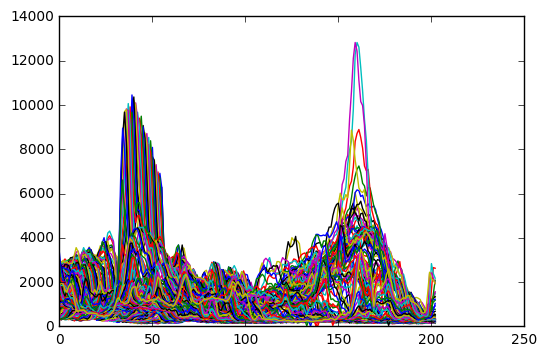

In [11]:
exposure_count = file_handler.variables["xps_img"][50,:,:]
plotter.plot(exposure_count)
plotter.show()